In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LinearRegression

In [19]:
# Create toy data 
x = np.arange(0, 10, 0.25)
y = x + (np.random.rand(len(x)) * 6)

# Extend x data to contain another row vector of 1s
#  .. these are weights for the regression
X = np.vstack([x, np.ones(len(x))]).T

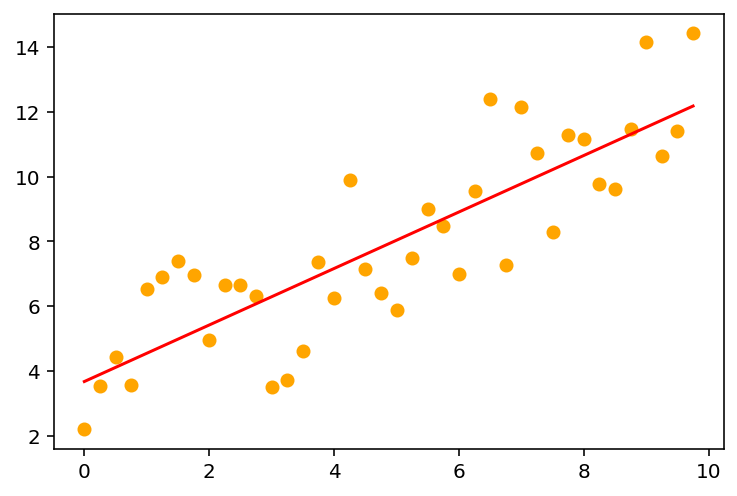

In [22]:
lr = LinearRegression()
lr.fit(X, y)

# scatter plot for the original data
plt.scatter(x,y, marker='o', color='orange', zorder=4)
# plot our best-fit line
plt.plot(x, lr.predict(X), color='red', zorder=5)

Okay, so by definition, that's the best line that fits the data. How confident are we in the result? There are formulas for confidence intervals, but we can actually see how those formulas work.

We're going to **bootstrap**. It's a really simple numerical method that works for a lot of statistics problem.
- randomly take a subset of the data (say 50%, 75%, etc.)
- perform our analysis (e.g., perform a regression, take the mean/average, etc.)
- repeat a lot
- look at the average and variance of the resulting repeated samples

An example might be useful: consider if I want to know if a coin flip is fair. If I flip it (i.e., sample randomly) 1000 times, I should have pretty reliable data due to the law of large numbers.

In this case, let's sample from our data, perform a linear regresion and repeat a lot:

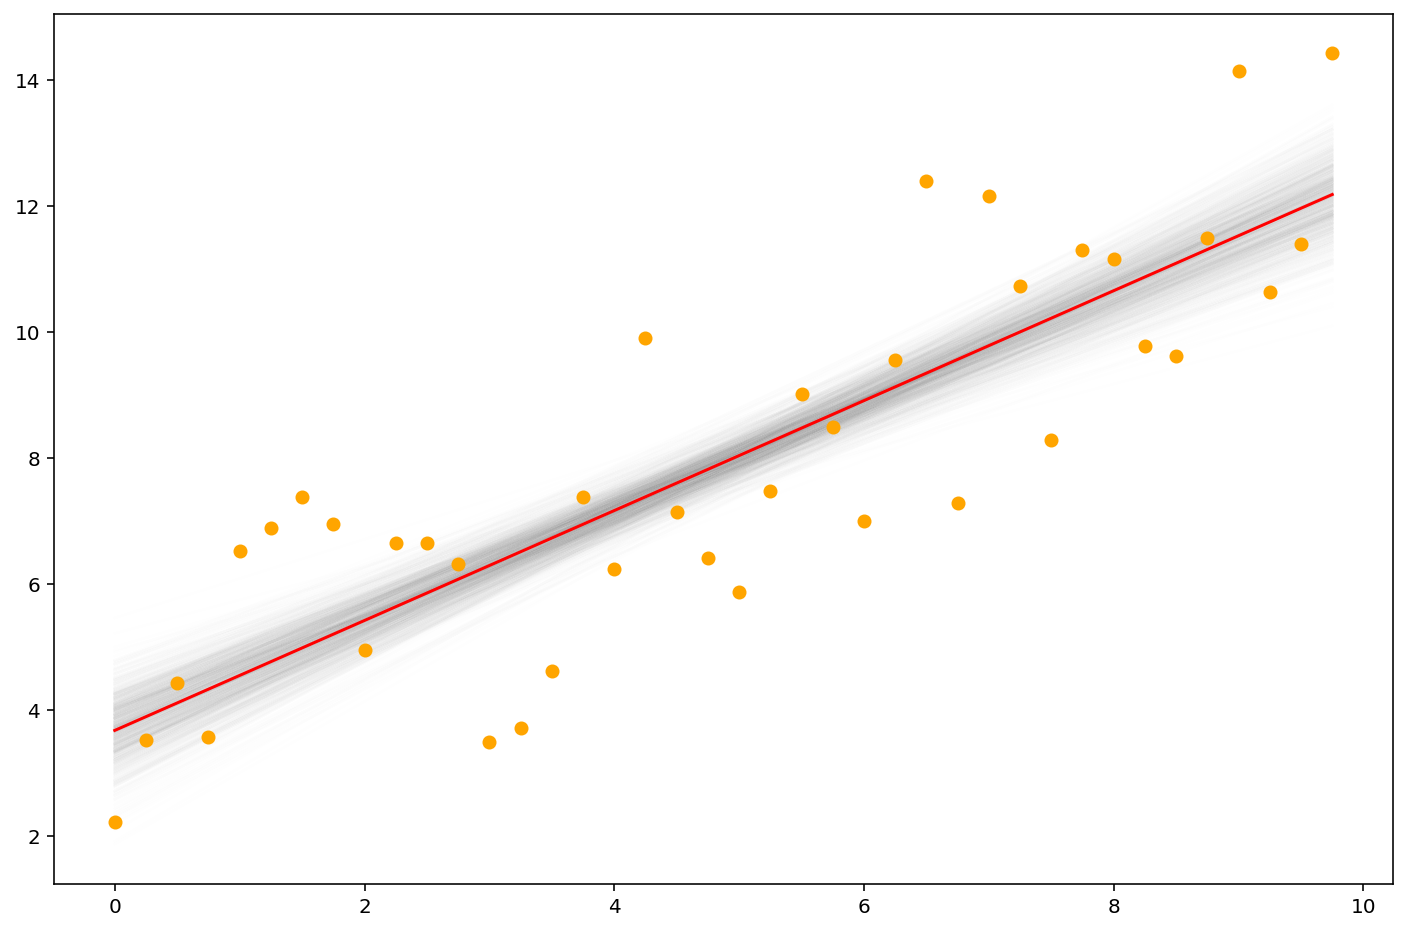

In [24]:
# adapted from https://stats.stackexchange.com/a/218988/42723

# create a plot for all our bootstrap regresssions
plt.figure(figsize=(12,8))

# how many times to do the bootstrap sampling
n_boot = 1000
for i in range(0, n_boot):
    # randomly pick from the data
    sample_index = np.random.choice(range(0, len(y)), len(y))

    X_samples = X[sample_index]
    y_samples = y[sample_index]    

    # perform the linear regresssion on our random samples
    lr = LinearRegression()
    lr.fit(X_samples, y_samples)
    # plot the predicted values from the regression with a semi-transparent line
    plt.plot(x, lr.predict(X), color='grey', alpha=3.0 / n_boot, zorder=1)

# scatter plot for the original data
plt.scatter(x,y, marker='o', color='orange', zorder=4)
# plot our best-fit line
lr.fit(X, y)
plt.plot(x, lr.predict(X), color='red', zorder=5)

Notice that the center part of the data has the narrowest confidence interval - and that the best-fit line tracks through the area of highest confidence. At the extremes, the confidence intervals are larger because the slope has some error.

From [XKCD](https://xkcd.com/2048/):
<img src="https://imgs.xkcd.com/comics/curve_fitting_2x.png" width="413" />